In [1]:
import time,os

import tensorflow as tf
import numpy as np

import skimage
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import custom_vgg19
import Lib,OtherNetDefs
import InputPipeline

In [2]:
BATCH_SIZE=10
NEW_H=256
NEW_W=256
input_shape = [BATCH_SIZE, 256, 256, 3]
content_ph = tf.placeholder(dtype=tf.float32, shape=input_shape)
style_ph = tf.placeholder(dtype=tf.float32, shape=[1]+input_shape[1:])

styconNet_type = 'product'
if styconNet_type == 'product':
    img_pred = Lib.buildStyconNet(content_ph, style_ph)
elif styconNet_type == 'concat':
    img_pred = OtherNetDefs.buildStyconNetConcat(content_ph, style_ph)
elif styconNet_type == 'multiproduct':
    img_pred = OtherNetDefs.buildStyconNetMultiProduct(content_ph, style_ph)

conv layer, output size: [10, 336, 336, 32]
conv layer, output size: [10, 168, 168, 64]
conv layer, output size: [10, 84, 84, 128]
START residual_block 
conv layer, output size: [10, 82, 82, 128]
conv layer, output size: [10, 80, 80, 128]
END residual_block
START residual_block 
conv layer, output size: [10, 78, 78, 128]
conv layer, output size: [10, 76, 76, 128]
END residual_block
conv layer, output size: [1, 336, 336, 32]
conv layer, output size: [1, 168, 168, 64]
conv layer, output size: [1, 84, 84, 128]
START residual_block 
conv layer, output size: [1, 82, 82, 128]
conv layer, output size: [1, 80, 80, 128]
END residual_block
START residual_block 
conv layer, output size: [1, 78, 78, 128]
conv layer, output size: [1, 76, 76, 128]
END residual_block
START residual_block 
conv layer, output size: [10, 74, 74, 128]
conv layer, output size: [10, 72, 72, 128]
END residual_block
START residual_block 
conv layer, output size: [10, 70, 70, 128]
conv layer, output size: [10, 68, 68, 128]
EN

In [6]:
import os
test_batch_f = os.listdir('contents/smalltestset/')[-BATCH_SIZE:]
assert len(test_batch_f) == BATCH_SIZE, ('not enough files', len(test_batch_f))
test_batch_np = np.zeros(input_shape)
for i in xrange(BATCH_SIZE):
    test_batch_np[i] = Lib.load_image_as_batch_with_optional_resize('contents/smalltestset/'+test_batch_f[i], newH=NEW_H, newW=NEW_W)
    
sess=tf.Session()
sess.run(tf.initialize_all_variables())
saver = tf.train.Saver()
saver.restore(sess, "chkpts/CSGTuples_OstagramStyconSmallLossProduct_10000.ckpt")

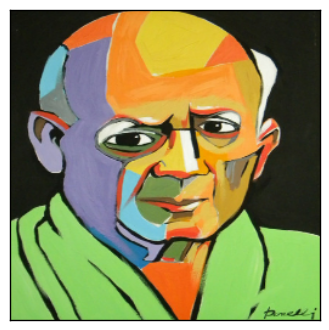

In [7]:
styleimg = Lib.load_image_as_batch_with_optional_resize('styles/donelli.jpg', newH=NEW_H, newW=NEW_W)
plt.imshow(styleimg[0])
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.show()

(0.45415044, 0.52405244)
(0.45415044, 0.52405244)
(0.45415044, 0.52405244)
(0.45415044, 0.52405244)
(0.45415044, 0.52405244)
(0.45415044, 0.52405244)
(0.45415044, 0.52405244)
(0.45415044, 0.52405244)
(0.45415044, 0.52405244)


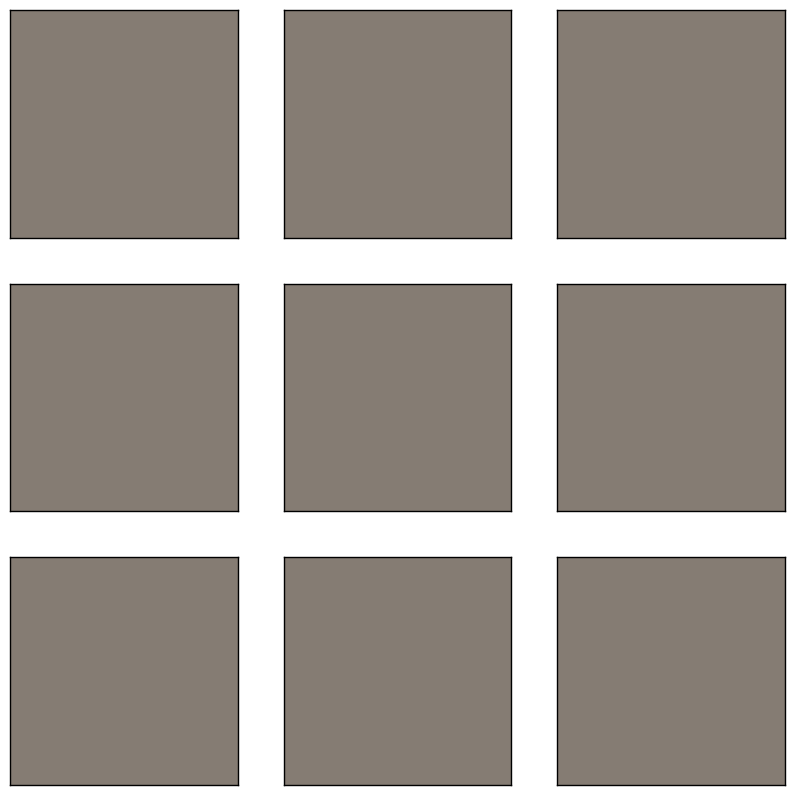

In [8]:
img_pred_np = sess.run(img_pred, feed_dict={content_ph: test_batch_np, style_ph:styleimg})

f,axarr=plt.subplots(3,3, figsize=(10,10))
for i in xrange(3):
    for j in xrange(3):
        img = np.clip(img_pred_np[i*3+j],0,1)
        axarr[i][j].imshow(img)
        axarr[i][j].xaxis.set_visible(False)
        axarr[i][j].yaxis.set_visible(False)
        print(np.min(img_pred_np[i*3+j]), np.max(img_pred_np[i*3+j]))
plt.show()

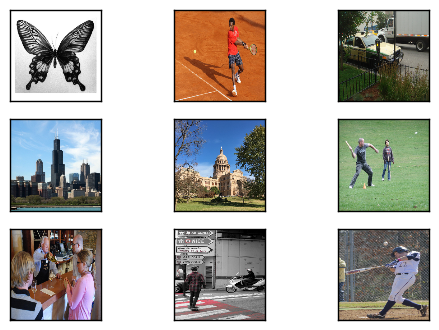

In [6]:
f,axarr=plt.subplots(3,3)
for i in xrange(3): 
    for j in xrange(3): 
        axarr[i][j].imshow(test_batch_np[i*3+j])
        axarr[i][j].xaxis.set_visible(False)
        axarr[i][j].yaxis.set_visible(False)
plt.show()

In [9]:
varlist = tf.all_variables()
{v.name: np.linalg.norm(sess.run(v)) for v in varlist}

{u'styconNet/con/Variable:0': nan,
 u'styconNet/con/Variable_1:0': nan,
 u'styconNet/con/Variable_2:0': nan,
 u'styconNet/con/Variable_3:0': nan,
 u'styconNet/con/Variable_4:0': nan,
 u'styconNet/con/Variable_5:0': nan,
 u'styconNet/con/Variable_6:0': nan,
 u'styconNet/con/instnorm_scale:0': nan,
 u'styconNet/con/instnorm_scale_1:0': nan,
 u'styconNet/con/instnorm_scale_2:0': nan,
 u'styconNet/con/instnorm_scale_3:0': nan,
 u'styconNet/con/instnorm_scale_4:0': nan,
 u'styconNet/con/instnorm_scale_5:0': nan,
 u'styconNet/con/instnorm_scale_6:0': nan,
 u'styconNet/con/instnorm_shift:0': nan,
 u'styconNet/con/instnorm_shift_1:0': nan,
 u'styconNet/con/instnorm_shift_2:0': nan,
 u'styconNet/con/instnorm_shift_3:0': nan,
 u'styconNet/con/instnorm_shift_4:0': nan,
 u'styconNet/con/instnorm_shift_5:0': nan,
 u'styconNet/con/instnorm_shift_6:0': nan,
 u'styconNet/decoder/Variable:0': nan,
 u'styconNet/decoder/Variable_1:0': nan,
 u'styconNet/decoder/Variable_2:0': nan,
 u'styconNet/decoder/Var